In [4]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


[1] 598.2451
[1] 18.70852
[1] 0.4471353


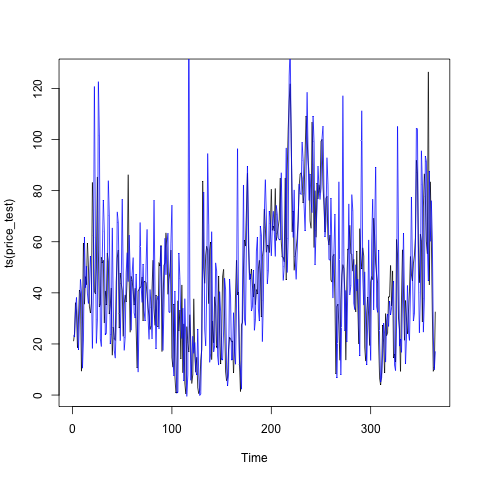

In [7]:
%%R
library(Rssa)

df = read.csv('final_daily.csv')
price = df[,"price"]
price_test = tail( price, 365 )
price_train = head( price, length(ts(df['price'])) - 365)

lprice = log(price+1)

lfor1 = NULL
n = length(price)
for( i in (n-365):(n-1) ){
  stmp = ssa( lprice[1:i], L = 24 )
  tmp = exp( rforecast( stmp, groups = list(trend = c(1:12) ) ) )-1
  lfor1 = c( lfor1, tmp )
}


plot(ts(price_test))
lines(ts(lfor1), col='blue')

print(mean( (ts(lfor1) - ts(price_test)) ^2))

print(mean( abs( lfor1 - price_test) ))

print(mean( pmin( abs( lfor1 - price_test)  / abs( price_test ),  1 ) ))

[1] 693156155
[1] 19373.1
[1] 0.05137282


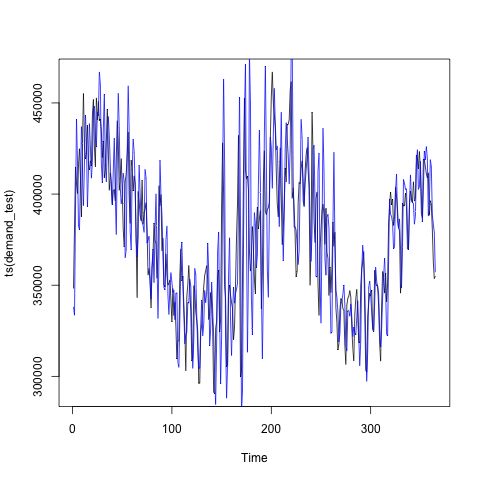

In [8]:
%%R
##Demand

demand = df[,"demand"]
demand_test = tail( demand, 365 )
demand_train = head( demand, length(ts(df['demand'])) - 365)

ldemand = log(demand+1)

lfor1 = NULL
n = length(demand)
for( i in (n-365):(n-1) ){
  stmp = ssa( ldemand[1:i], L = 24 )
  tmp = exp( rforecast( stmp, groups = list(trend = c(1:12) ) ) )-1
  lfor1 = c( lfor1, tmp )
}


plot(ts(demand_test))
lines(ts(lfor1), col='blue')

print(mean( (ts(lfor1) - ts(demand_test)) ^2))

print(mean( abs( lfor1 - demand_test) ))

print(mean( pmin( abs( lfor1 - demand_test)  / abs( demand_test ),  1 ) ))